# SUPPLEMENTARY_11.Visualization Maps by Situations
Plot the Stimulus Constant Analysis after randomise from fsl




Preprint at https://www.biorxiv.org/content/10.1101/2022.10.20.513114v1

*Yiyu Wang 2024 April*

In [ ]:
import glob
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib


import warnings
warnings.filterwarnings('ignore')
calculate = False

In [ ]:
bg_img = 'masks/FSL_MNI152_T1_3mm_brain.nii.gz'

#load behavioral data
behavdata_dir =  'BehavData/'
zratings =glob.glob(behavdata_dir +'AffVids_novel_interpolated_rating_zscored.csv')
zratings = pd.read_csv(zratings[0],index_col=0).reset_index()

my_radius = 15

# subjects information
subjects_str = ['04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','23','25','26','28','29'] 
subjects = list(range(4,20))+[23,25,26,28,29]
Nsub = len(subjects)
print("subjects in this analysis:")
print(subjects_str)
print(f"**** n = {Nsub} *****" )

k_fold = 3
my_radius = 15
cluster_thre = 1
my_slices = [-24, -12, 0, 12, 21, 30, 42, 54]


VMAX = 0.45

res_dir = 'results/visual_decoder/'
avg_dir = 'results/visual_decoder/avg/'

        
my_color_three = ['#1f77b4', '#9edae5', '#EF2D2E']
color_padding_three =['#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3']
my_cmap_three = matplotlib.colors.ListedColormap(color_padding_three + my_color_three)


In [ ]:
def get_video_lists(vcat):
    
    if vcat == 'Heights':
        videos = list(range(1,13))
    elif vcat == 'Social':
        videos = list(range(13,25))
    elif vcat == 'Spiders':
        videos = list(range(25,37))
    else: # v_cat == 'Situation_General'
        videos = list(range(1,37))

    return videos

In [ ]:
situation_list = ['Heights', 'Social', 'Spiders']
for situation in situation_list:
    video_list = get_video_lists(situation)
    f_list = [avg_dir + f'kfold3_video-{v}_searchlight_pearsonr_avg.nii.gz' for v in video_list]
    sit_img = image.load_img(f_list)
    sit_t_img = math_img('x*np.sqrt(10)/np.sqrt(1-x**2)', x=sit_img)
    sit_t_img.to_filename(avg_dir + f'kfold3_{situation}_searchlight_t.nii.gz')
    print(sit_t_img.shape)


In [2]:
import glob
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib
import warnings

# stats
from scipy import linalg, ndimage, stats
from scipy.stats import norm

# nifti handling
from nilearn.input_data import NiftiMasker
from nilearn import decoding
from nilearn.masking import apply_mask, intersect_masks
from nilearn import image
from nilearn.image import new_img_like, load_img, get_data, concat_imgs, mean_img, math_img

from nilearn import surface

# nilearn mask:
from nilearn.datasets import fetch_surf_fsaverage


# plotting modules
from nilearn import plotting
from nilearn import surface
fsaverage = fetch_surf_fsaverage()

warnings.filterwarnings('ignore')

/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
test_res_dir = 'results/visual_decoder/avg'

mask_dir = 'masks/'
bg_img = mask_dir + 'MNI152_T1_1mm_brain.nii.gz'


In [4]:
# plot the results:
def make_surface(texture_left, texture_right, title=' ', vmin=-0.01, vmax=0.5, threshold=0.05, output_dir=test_res_dir):

    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14,10), subplot_kw={'projection': '3d'})
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    plotting.plot_surf(fsaverage.infl_left, texture_left,view='lateral', hemi='left', cmap="plasma",
                                colorbar=False,vmin=vmin, vmax =vmax,avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_left,axes=ax[0,0], darkness = 0.5, inflate=True)


    plotting.plot_surf(fsaverage.infl_right, texture_right,view='lateral', hemi='right', cmap="plasma",
                                colorbar=False, vmin=vmin,vmax =vmax,avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_right, axes=ax[0,1], darkness = 0.5, inflate=True)


    plotting.plot_surf(fsaverage.infl_left, texture_left,view='medial', hemi='left', cmap="plasma",
                                colorbar=False, vmin=vmin, vmax=vmax,avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_left,axes=ax[1,0], darkness = 0.5, inflate=True)

    plotting.plot_surf(fsaverage.infl_right, texture_right,view='medial', hemi='right', cmap="plasma",
                                colorbar=False, vmin=vmin,vmax =vmax, avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_right,axes=ax[1,1], darkness = 0.5, inflate=True)

    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar = matplotlib.colorbar.ColorbarBase(
        cbar_ax,
        ticks=[-4, 4],
        norm=norm,
        orientation="vertical",
        cmap='plasma',
        spacing="proportional",
    )
    cbar_ax.set_yticklabels(["-4", "4"])
    cbar.ax.axhline(y=0.18) 
    plt.title(title)
    plt.savefig(output_dir + title + '.png')
    plt.show()



# Visual decoder

In [5]:
# load each situation:
situation_list = ['Heights', 'Social', 'Spiders']

4.5839205
0.0


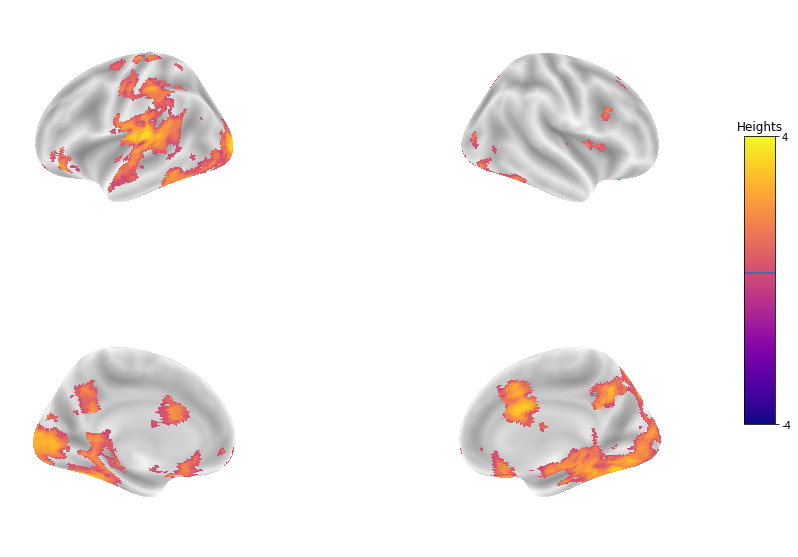

4.5240536
0.0


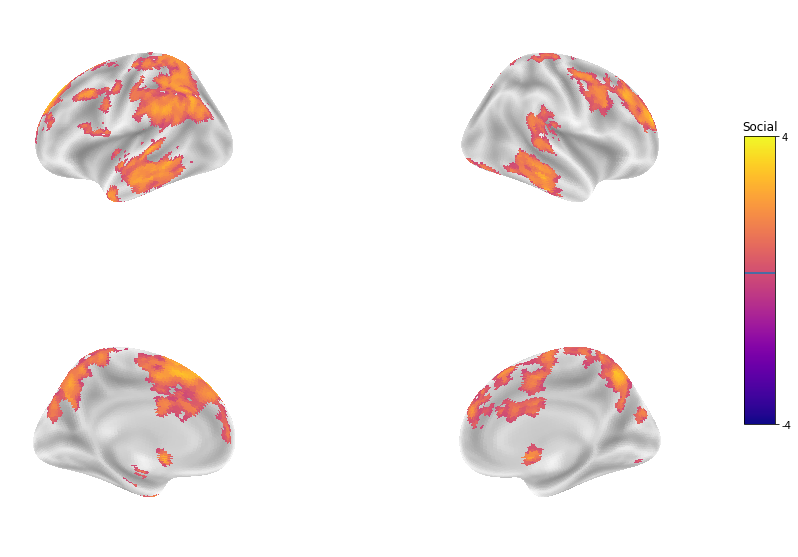

3.9931588
0.0


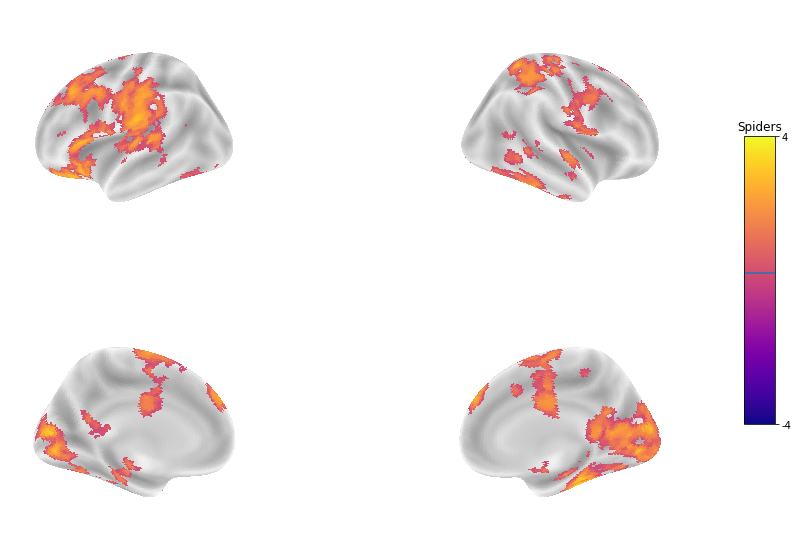

In [6]:
texture_right_list, texture_left_list = [], []
pval_mask_list = []
for situation in situation_list:
    p_val = nib.load(test_res_dir + f'/kfold3_{situation}_searchlight_t_randomise_tfce_corrp_tstat1.nii.gz')
    p_val_mask = math_img('img != 0', img=p_val)
    t_stats = nib.load(test_res_dir + f'/kfold3_{situation}_searchlight_t_randomise_tstat1.nii.gz')
    overlay = math_img('img * mask', mask=p_val_mask, img = t_stats)
    pval_mask_list.append(p_val_mask)
    # overlay = p_val_mask
    
    print(np.max(overlay.get_data()))
    print(np.min(overlay.get_data()))
    texture_right = surface.vol_to_surf(overlay, fsaverage.pial_right, interpolation='nearest')
    texture_left = surface.vol_to_surf(overlay, fsaverage.pial_left, interpolation='nearest')

    texture_right_list.append(texture_right)
    texture_left_list.append(texture_left)
    make_surface(texture_left=texture_left, texture_right=texture_right, vmin=-4, vmax=4, threshold=0.05, output_dir=test_res_dir, title=situation)

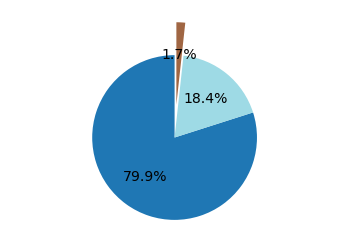

In [9]:
# get the overlay of the three maps binarized:
overlay = math_img('img1 + img2 + img3', img1=pval_mask_list[0], img2=pval_mask_list[1], img3=pval_mask_list[2])


# color
my_color_three_fig3 = ['#1f77b4', '#9edae5', '#A06643']
color_padding_three_fig3 =['#1f77b4', '#9edae5','#D3D3D3','#D3D3D3']
my_cmap_three_fig3 = matplotlib.colors.ListedColormap(color_padding_three_fig3 + my_color_three_fig3)


overlay_data = overlay.get_fdata()

one = np.sum(overlay_data==1)
two = np.sum(overlay_data==2)
three = np.sum(overlay_data==3)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'Situation dependent', 'Situation dependent:2', 'Situation General'
labels = ' ', ' ', ' '
sizes = [one, two, three]
explode = (0, 0, 0.4)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 14},
        shadow=False, startangle=90, colors = my_color_three_fig3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
